In [142]:
import pandas as pd
import numpy as np
import sklearn
# from google.colab import drive

In [143]:
# drive.mount('/content/drive')

In [144]:
# give path to the data.csv 
file_path = '/content/data (2).csv' 

As one may see, the csv file contains actual labels and the predicted probabilities from two ML model (random forest and logistic regression).

In [145]:
df = pd.read_csv(file_path)
df.head()


,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


You have to take a threshold value and will have to predict final label. 
So add two new columns named as 'y_pred_rf'and 'y_pred_lr' in the df dataframe. These new columns will have final label predicted by the two models based on the threshold set.

In [146]:
thresh = 0.5
df['y_pred_rf'] = (df.y_pred_random_forest >= 0.5).astype('int')
df['y_pred_lr'] = (df.y_pred_logistic >= 0.5).astype('int')
df.head()


def predict(thresh, y_pred_random_forest, y_pred_logistic):
  df['y_pred_rf'] = (y_pred_random_forest >= thresh).astype('int')
  df['y_pred_lr'] = (y_pred_logistic >= thresh).astype('int')
  
predict(0.5, df.y_pred_random_forest, df.y_pred_logistic)
df.head()




,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [147]:
df.shape



(15758, 5)

Complete below function to compute true positive (tp), tn, fn, fp

In [148]:
def compute_tp_tn_fn_fp(y_act, y_pred):
   tp=0
   fn=0
   tn=0
   fp=0
   for i in range (df.shape[0]):
    if y_act[i]==1 and y_pred[i]==y_act[i]:
       tp+=1
    if y_act[i]==1 and y_pred[i]!=y_act[i]:
       fn+=1
    if y_act[i]==0 and y_pred[i]==y_act[i]:
       tn+=1
    if y_act[i]==0 and y_pred[i]!= y_act[i]:
       fp+=1
   return tp, tn, fp, fn

In [149]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 4279
TN for Logistic Reg : 5425
FP for Logistic Reg : 2454
FN for Logistic Reg : 3600


In [150]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act, df.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


Let's verify result from sklearn

In [151]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df.y_pred_rf).ravel()

In [152]:
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


In a similar way complete all the functions below

In [153]:
def compute_accuracy(tp, tn, fn, fp):
 acc= (tp/(tp+fn)+tn/(tn+fp))/2 *100
 return acc

In [154]:
print('Accuracy for Logistic Regression :', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Accuracy for Random Forest :', compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Random Forest : 67.05165630156111


In [155]:
from sklearn.metrics import accuracy_score

In [156]:
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df.y_pred_lr))
print('Accuracy for Logistic Regression :', 100*accuracy_score(df.y_act, 
                                                           df.y_pred_rf))

Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Logistic Regression : 67.05165630156111


In [157]:
def compute_precision(tp, fp):
 precision= tp/(tp+fp) 
 return precision

In [158]:
print('Precision for Logistic Regression :', 100* compute_precision(tp_lr, fp_lr))
print('Precision for Random Forest :', 100* compute_precision(tp_rf, fp_rf))

Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [159]:
from sklearn.metrics import precision_score
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df.y_pred_lr))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df.y_pred_rf))

Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [160]:
def compute_recall(tp,fn):
 recall= tp/ (tp+fn)
 return recall

In [161]:
print('Recall for Logistic Regression :', 100* compute_recall(tp_lr, fn_lr))
print('Recall for Random Forest :', 100* compute_recall(tp_rf, fn_rf))

Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [162]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df.y_pred_lr))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df.y_pred_rf))

Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [163]:
def compute_f1_score(y_true, y_pred):
  tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
  recall= compute_recall(tp, fn)
  precision= compute_precision(tp, fp)
  f1_score= 2/ (1/precision + 1/recall)  
  return f1_score

In [164]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_act, 
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_act, 
                                                             df.y_pred_rf))

F1 score for Logistic Regression : 0.5856830002737476
F1 score for Random Forest : 0.6603427973308911


In [165]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df.y_pred_lr))
print('F1 score for Random Forest :', f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.5856830002737475
F1 score for Random Forest : 0.660342797330891


In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
rf_auc = roc_auc_score(df.y_act, df.y_pred_rf)
lr_auc = roc_auc_score(df.y_act, df.y_pred_lr)

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(6):
#     fpr[i], tpr[i], _ = roc_curve(df.y_act, df.y_pred_lr)
#     roc_auc[i] = auc(fpr[i], tpr[i])

# print (roc_auc_score(df.y_act, df.y_pred_lr))
# plt.figure()
# plt.plot(fpr[1], tpr[1])
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.show()





In [167]:
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random Forest: AUROC = 0.671
Logistic Regression: AUROC = 0.616


In [168]:
rf_fpr, rf_tpr, _ = roc_curve(df.y_act, df.y_pred_rf)
lr_fpr, lr_tpr, _ = roc_curve(df.y_act, df.y_pred_lr)

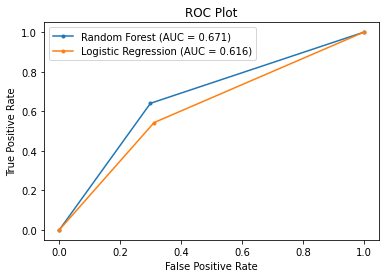

In [169]:
import matplotlib.pyplot as plt


plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()